In [6]:
import pandas
import pickle
from Swimmer import *
from datetime import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.cm as cm
import pandas as pd

In [7]:
# Ripetiamo il codice dello stile scelto
Stile = "04"

In [8]:
# Individuiamo il nome della gara
S = {"00": "50 SL", "01": "100 SL", "02": "200 SL", "04": "400 SL", "08": "800 SL", "15": "1500 SL", "20": "50 DO", "21": "100 DO", "22": "200 DO", "30": "50 RA", "31": "100 RA", "32": "200 RA", "40": "50 FA", "41": "100 FA", "42": "200 FA", "50": "50 MI", "51": "100 MI", "54": "400 MI"}

In [9]:
# Apriamo il database
with open("nuotatori_"+Stile+"_db.pkl","rb") as pkl:
     swimmers = pickle.load( pkl)

In [10]:
# Imposto il ratio e facciamo vedere un esempio sul primo nuotatore
RATIO = 0.8
print(swimmers[0].times_date)

[('04:20.07', '07/06/2009'), ('04:22.76', '27/06/2004'), ('04:22.94', '25/06/2007'), ('04:23.70', '01/03/2007'), ('04:24.31', '23/06/2009'), ('04:27.62', '20/11/2011'), ('04:28.84', '21/06/2010'), ('04:29.01', '09/07/2012'), ('04:29.05', '24/06/2014'), ('04:29.45', '18/11/2012'), ('04:30.30', '24/11/2002'), ('04:30.97', '23/11/2013'), ('04:34.12', '23/11/2014'), ('04:36.04', '21/02/2004'), ('04:36.10', '25/06/2002')]


In [11]:
# Filtriamo i nuotatori per il ratio impostato
filtered_swimmers = list(filter(lambda x: x.ratio >= RATIO, swimmers))

In [12]:
# Stampiamo tutti i nuotatori che soddisfano la precedente funzione
for i in filtered_swimmers:
    print(str(i))
print (len(filtered_swimmers))

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 1.0
Name: SMRIGLIO STEFANO Class: 1967 Ratio: 0.8235294117647058
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.8235294117647058
Name: ALFONSI EMIDIO Class: 1965 Ratio: 0.8823529411764706
Name: MASSA MASSIMILIANO Class: 1967 Ratio: 1.0
Name: TAGLIAVIA PAUL JOLIN Class: 1957 Ratio: 0.9411764705882353
Name: CAMMELLI BELLUZZO LUCIANO Class: 1943 Ratio: 0.9411764705882353
Name: INNAMORATI GIUSEPPE Class: 1952 Ratio: 0.9411764705882353
Name: MORICI GIUSEPPE Class: 1956 Ratio: 0.8235294117647058
Name: OLIVA PIERO Class: 1943 Ratio: 0.8823529411764706
Name: CASELLI ANDREA Class: 1948 Ratio: 0.9411764705882353
Name: COLOZZO SALVATORE Class: 1950 Ratio: 0.8823529411764706
12


In [13]:
# Lista dei nuotatori con i dati filtrati
for i in filtered_swimmers:
    print(str(i), i.times_date, i.locality)

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 1.0 [('04:38.98', '23/06/2008'), ('04:39.61', '23/06/2009'), ('04:44.19', '27/06/2004'), ('04:44.20', '07/05/2005'), ('04:44.44', '27/04/2008'), ('04:44.80', '25/06/2007'), ('04:45.93', '06/05/2007'), ('04:46.60', '02/05/2004'), ('04:47.48', '20/06/2011'), ('04:47.49', '02/02/2008'), ('04:48.45', '28/06/2006'), ('04:49.00', '04/05/2003'), ('04:49.45', '29/05/2011'), ('04:49.80', '15/02/2004'), ('04:49.95', '21/06/2010'), ('04:50.18', '02/07/2013'), ('04:50.70', '27/05/2012'), ('04:51.02', '09/05/2010'), ('04:51.23', '02/12/2012'), ('04:51.84', '24/05/2015'), ('04:51.89', '09/07/2012'), ('04:52.36', '24/06/2014'), ('04:52.39', '10/12/2011'), ('04:52.86', '21/12/2014'), ('04:53.80', '24/06/2003'), ('04:54.38', '01/12/2013'), ('04:54.68', '01/03/2014'), ('04:55.50', '25/06/2002'), ('04:55.53', '13/12/2015'), ('04:57.12', '26/05/2013'), ('04:58.18', '26/02/2016'), ('04:59.89', '26/03/2017'), ('05:01.09', '17/12/2017')] ['PALERMO', 'RICCIONE', 'ROSSA

In [14]:
 def str_to_date(d):
        """prende in input una data formattata "%d/%m/%Y"""
        return datetime.strptime(d[1], "%d/%m/%Y")

In [15]:
 def str_to_time(s):
        """prende in input un tempo formattato "%s.%us"""
        a=datetime.strptime(s[0], "%M:%S.%f")
        return a.minute*60 + a.second + (a.microsecond/ (10**6))
        

In [16]:
 def str_to_time2(s):
        """prende in input un tempo formattato "%s.%us"""
        return datetime.strptime(s[0], "%M:%S.%f")

In [17]:
for i in filtered_swimmers:
    i.converted_date_time=[]
    for j in i.times_date:
        i.converted_date_time.append(
        (str_to_date(j),
        str_to_time(j)))

In [18]:
for i in filtered_swimmers:
    print(str(i),
        #tuple((x.year,x.month,x.day,y)for x,y in i.converted_date_time)
        list(((j.date(),k) for j,k in i.converted_date_time)))

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 1.0 [(datetime.date(2008, 6, 23), 278.98), (datetime.date(2009, 6, 23), 279.61), (datetime.date(2004, 6, 27), 284.19), (datetime.date(2005, 5, 7), 284.2), (datetime.date(2008, 4, 27), 284.44), (datetime.date(2007, 6, 25), 284.8), (datetime.date(2007, 5, 6), 285.93), (datetime.date(2004, 5, 2), 286.6), (datetime.date(2011, 6, 20), 287.48), (datetime.date(2008, 2, 2), 287.49), (datetime.date(2006, 6, 28), 288.45), (datetime.date(2003, 5, 4), 289.0), (datetime.date(2011, 5, 29), 289.45), (datetime.date(2004, 2, 15), 289.8), (datetime.date(2010, 6, 21), 289.95), (datetime.date(2013, 7, 2), 290.18), (datetime.date(2012, 5, 27), 290.7), (datetime.date(2010, 5, 9), 291.02), (datetime.date(2012, 12, 2), 291.23), (datetime.date(2015, 5, 24), 291.84), (datetime.date(2012, 7, 9), 291.89), (datetime.date(2014, 6, 24), 292.36), (datetime.date(2011, 12, 10), 292.39), (datetime.date(2014, 12, 21), 292.86), (datetime.date(2003, 6, 24), 293.8), (datetime.date(20

Altrimenti cominciate a fare un po’ di statistica descrittiva.
In particolare:

1. Cosa succede se scelgo il 70% invece dell’80% ? Come cambia il dataset?
2. Per ogni gara, rappresentate (visualizzate) le prestazioni su un grafico con sulle ascisse la data e sulle ordinate il tempo di gara.
3. Calcolate medie, mediana, percentile, ecc.

In generale, quello che vogliamo fare è prevedere la performance di un atleta in funzione dell’età utilizzando questo dataset come training set.
Quindi iniziate a pensare quali variabili e quale modello utilizzare per fare questa previsione. Per esempio: le stagioni impattano sulla performance?

A presto,

FR

In [19]:
# Ora facciamo vedere cosa succede al dataset se prendiamo i nuotatori che hanno partecipato al 70% di gare
RATIO = 0.7

In [20]:
# Filtriamo i nuotatori per il ratio impostato
filtered_swimmers2 = list(filter(lambda x: x.ratio >= RATIO, swimmers))

In [21]:
# Stampiamo tutti i nuotatori che soddisfano la precedente funzione
for i in filtered_swimmers2:
    print(str(i))
print (len(filtered_swimmers2))

Name: PECCARISI FABRIZIO Class: 1963 Ratio: 0.7058823529411765
Name: D'ARPA GIROLAMO Class: 1967 Ratio: 1.0
Name: DELLI GUANTI GAETANO Class: 1961 Ratio: 0.7058823529411765
Name: SMRIGLIO STEFANO Class: 1967 Ratio: 0.8235294117647058
Name: PARRINELLO GERARDO NICOLA Class: 1958 Ratio: 0.7058823529411765
Name: MANCUSI DAVIDE Class: 1959 Ratio: 0.7647058823529411
Name: BRUGNOLI ALESSIO Class: 1964 Ratio: 0.7058823529411765
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.8235294117647058
Name: MARZULLO STEFANO Class: 1959 Ratio: 0.7058823529411765
Name: ALFONSI EMIDIO Class: 1965 Ratio: 0.8823529411764706
Name: D'ALESSANDRO VINCENZO Class: 1955 Ratio: 0.7647058823529411
Name: MASSA MASSIMILIANO Class: 1967 Ratio: 1.0
Name: LAIS GIORGIO Class: 1962 Ratio: 0.7647058823529411
Name: TAGLIAVIA PAUL JOLIN Class: 1957 Ratio: 0.9411764705882353
Name: CAMMELLI BELLUZZO LUCIANO Class: 1943 Ratio: 0.9411764705882353
Name: GHIGLIONE MARCO Class: 1958 Ratio: 0.7058823529411765
Name: INNAMORATI GIUSEPPE Clas

In [22]:
# Listiamo i tempi di ogni nuotatore
def tempitotali(x):
    i.listtime=[]
    for j in i.times_date:
        i.listtime.append(
        str_to_time(j))
    return i.listtime

In [23]:
# Listiamo le date di ogni nuotatore
def datetotali(x):
    i.listdate=[]
    for j in i.times_date:
        i.listdate.append((str_to_date(j).date()))
    return i.listdate

In [24]:
# Forniamo la descrizione di ogni nuotatore
def descriptiveStat (x):
    print (str(x))
    print ('Dataset lenght:', len(tempitotali(x)))
    print ('Minimum value:', np.min(tempitotali(x)))
    print ('Maximum value:', np.max(tempitotali(x)))
    print ('Mean value:', np.mean(tempitotali(x)))
    print ('Median value:', np.median(tempitotali(x)))
    print ('First quartile', np.percentile((tempitotali(x)), 25))
    print ('Third quartile', np.percentile((tempitotali(x)), 75))

In [25]:
for i in filtered_swimmers:
    descriptiveStat(i)

Name: D'ARPA GIROLAMO Class: 1967 Ratio: 1.0
Dataset lenght: 33
Minimum value: 278.98
Maximum value: 301.09
Mean value: 290.454848485
Median value: 290.7
First quartile 287.48
Third quartile 293.8
Name: SMRIGLIO STEFANO Class: 1967 Ratio: 0.8235294117647058
Dataset lenght: 23
Minimum value: 282.43
Maximum value: 319.99
Mean value: 299.347826087
Median value: 300.66
First quartile 289.265
Third quartile 306.92
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.8235294117647058
Dataset lenght: 27
Minimum value: 290.95
Maximum value: 318.5
Mean value: 302.523333333
Median value: 301.13
First quartile 297.335
Third quartile 308.295
Name: ALFONSI EMIDIO Class: 1965 Ratio: 0.8823529411764706
Dataset lenght: 21
Minimum value: 291.77
Maximum value: 319.18
Mean value: 301.383809524
Median value: 299.52
First quartile 296.23
Third quartile 303.11
Name: MASSA MASSIMILIANO Class: 1967 Ratio: 1.0
Dataset lenght: 41
Minimum value: 304.08
Maximum value: 326.92
Mean value: 313.915121951
Median value: 313.14
F

In [26]:
# Creiamo il DataFrame
nome=[]
tempi=[]
date=[]
for i in filtered_swimmers:
    for j in i.times_date:
        nome.append(i.name)
        tempi.append((str_to_time(j)))
        date.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
        
Nuotatori = pd.DataFrame({'Nuotatore': nome,'Time': tempi, 'Date': date})
Nuotatori

,Date,Nuotatore,Time
0,2007-2008,D'ARPA GIROLAMO,278.98
1,2008-2009,D'ARPA GIROLAMO,279.61
2,2003-2004,D'ARPA GIROLAMO,284.19
3,2004-2005,D'ARPA GIROLAMO,284.20
4,2007-2008,D'ARPA GIROLAMO,284.44
5,2006-2007,D'ARPA GIROLAMO,284.80
6,2006-2007,D'ARPA GIROLAMO,285.93
7,2003-2004,D'ARPA GIROLAMO,286.60
8,2010-2011,D'ARPA GIROLAMO,287.48
9,2007-2008,D'ARPA GIROLAMO,287.49


In [27]:
# Aggiustiamo i dati, raggruppandoli
Nuotatori_plot = pd.DataFrame(Nuotatori.groupby([Nuotatori['Date'], Nuotatori['Nuotatore']]).Time.agg('mean'))

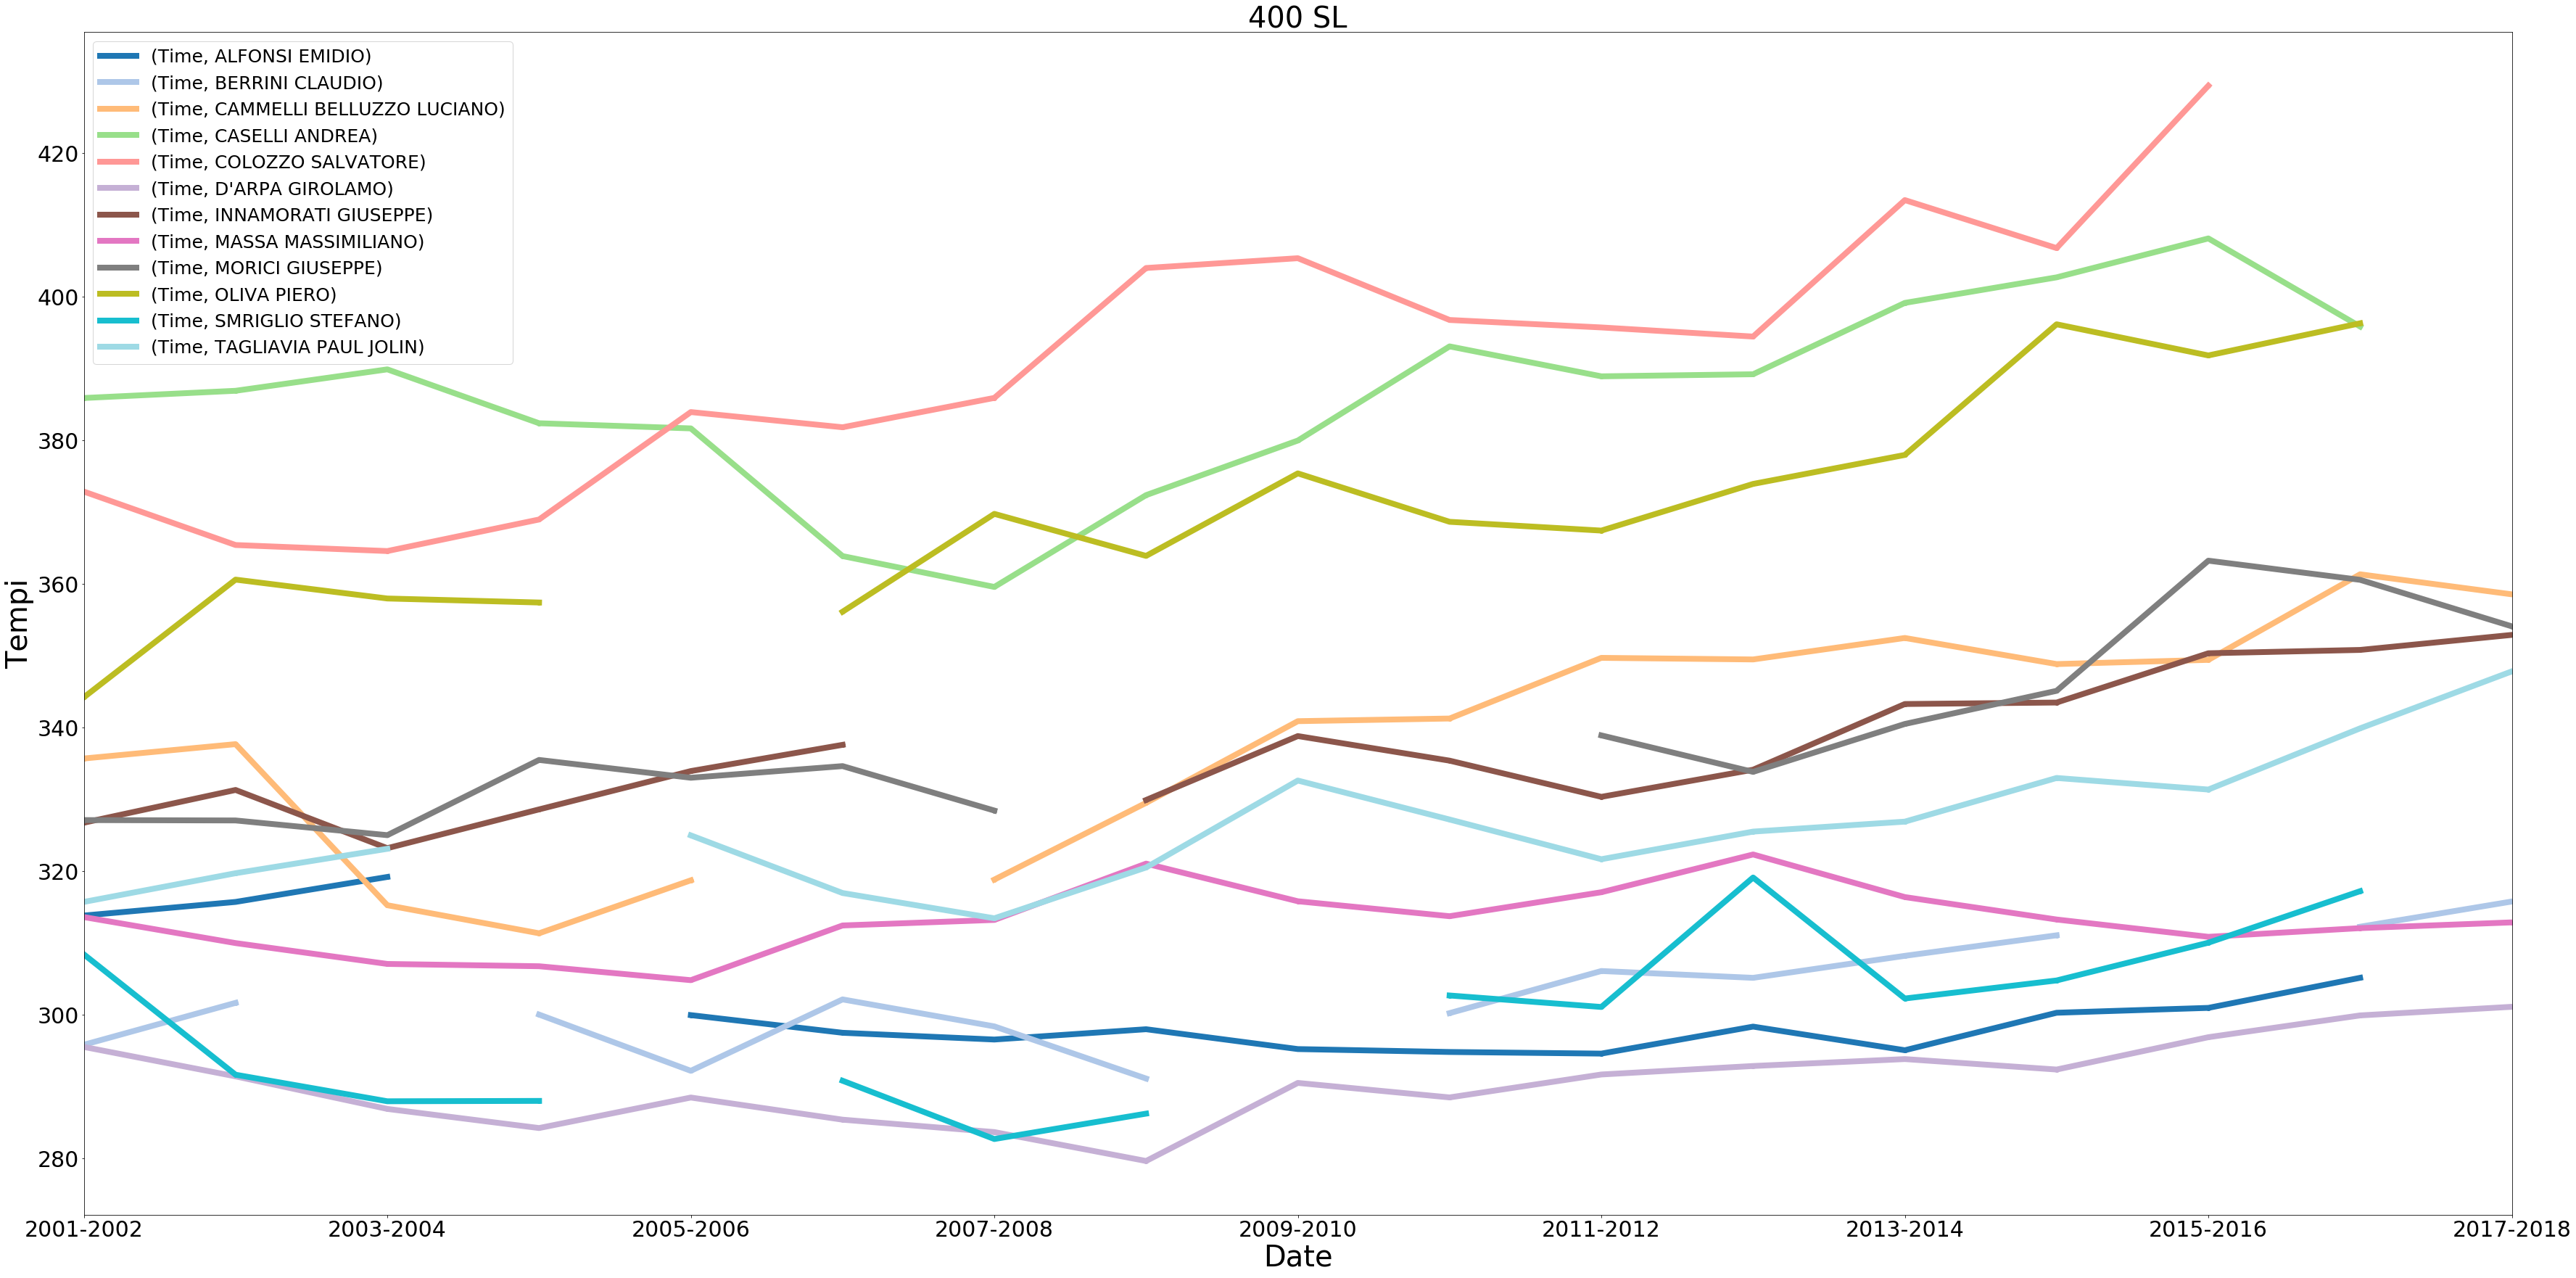

In [28]:
# Plottiamo il tutto in uno plot
colors=cm.tab20(np.linspace(0,1,len(filtered_swimmers)))
Nuotatori_plot.pivot_table(index='Date', columns='Nuotatore').plot(marker= 'o',linestyle='-',linewidth=8,figsize=(60, 30), fontsize=30, color=colors)
plt.xlabel('Date',fontsize=40)
plt.ylabel('Tempi',fontsize=40)
plt.title(S[Stile],fontsize=40)
plt.legend(fontsize=25)

In [29]:
# Funzione che ci permette di dividere i dati in base alle Stagioni
def select_season_of_year(d,s):
        """prende in input una data formattata in datetime e decide la stagionalita` dell'anno di partecipazione"""
        date = datetime.strptime(d[1], "%d/%m/%Y")
        if s=='inverno':
            if date.month >= 12 or date.month <= 2:
                return True
        if s=='primavera':
            if date.month >= 3 and date.month <= 5:
                return True
        if s=='estate':
            if date.month >= 6 and date.month <= 8:
                return True
        if s=='autunno':
            if date.month >= 9 and date.month <= 11:
                return True
        return False

In [30]:
# Dividiamo i dati dei nuotatori in base alle Stagioni dell'anno
nomep=[]
tempip=[]
datep=[]
nomee=[]
tempie=[]
datee=[]
nomea=[]
tempia=[]
datea=[]
nomei=[]
tempii=[]
datei=[]
for i in filtered_swimmers:
    for j in i.times_date:
        if select_season_of_year(j,'inverno'):
            nomei.append(i.name)
            datei.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempii.append((str_to_time(j)))
        if select_season_of_year(j,'primavera'):
            nomep.append(i.name)
            datep.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempip.append((str_to_time(j)))
        if select_season_of_year(j,'estate'):
            nomee.append(i.name)
            datee.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempie.append((str_to_time(j)))
        if select_season_of_year(j,'autunno'):
            nomea.append(i.name)
            datea.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempia.append((str_to_time(j)))
            
Nuotatori_primavera = pd.DataFrame({'Nuotatore': nomep,'Time': tempip, 'Date': datep})
Nuotatori_estate = pd.DataFrame({'Nuotatore': nomee,'Time': tempie, 'Date': datee})
Nuotatori_autunno = pd.DataFrame({'Nuotatore': nomea,'Time': tempia, 'Date': datea})
Nuotatori_inverno = pd.DataFrame({'Nuotatore': nomei,'Time': tempii, 'Date': datei})

In [31]:
# Aggiustiamo i dati, raggruppandoli
Nuotatori_primavera_plot = pd.DataFrame(Nuotatori_primavera.groupby([Nuotatori_primavera['Date'], Nuotatori_primavera['Nuotatore']]).Time.agg('mean'))
Nuotatori_estate_plot = pd.DataFrame(Nuotatori_estate.groupby([Nuotatori_estate['Date'], Nuotatori_estate['Nuotatore']]).Time.agg('mean'))
Nuotatori_autunno_plot = pd.DataFrame(Nuotatori_autunno.groupby([Nuotatori_autunno['Date'], Nuotatori_autunno['Nuotatore']]).Time.agg('mean'))
Nuotatori_inverno_plot = pd.DataFrame(Nuotatori_inverno.groupby([Nuotatori_inverno['Date'], Nuotatori_inverno['Nuotatore']]).Time.agg('mean'))                  

In [32]:
Nuotatori_primavera_pivot = Nuotatori_primavera_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_inverno_pivot = Nuotatori_inverno_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_autunno_pivot = Nuotatori_autunno_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_estate_pivot = Nuotatori_estate_plot.pivot_table(index='Date', columns='Nuotatore')

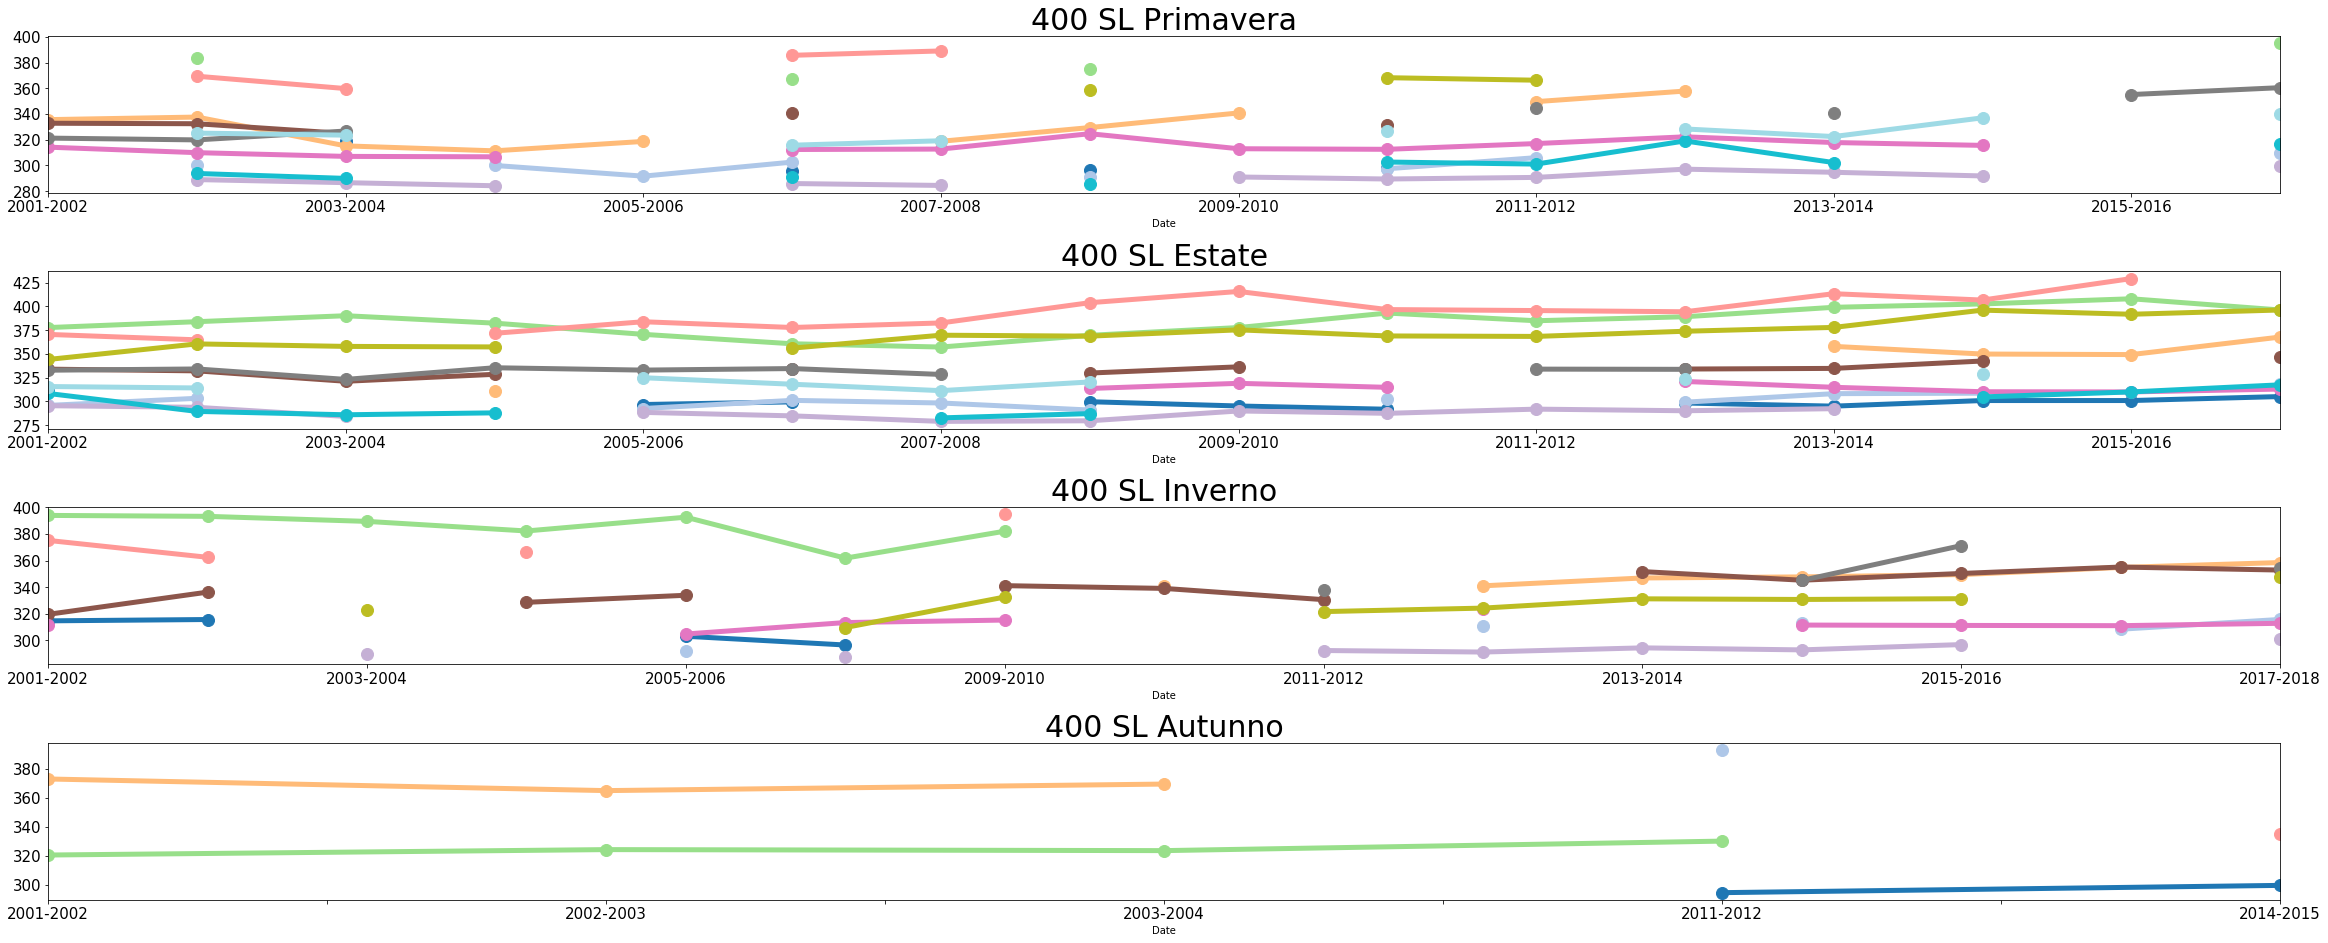

In [33]:
# Plottiamo i dati dei nuotatori in base alle Stagioni dell'anno
plt.subplot(4, 1, 1)
Nuotatori_primavera_pivot.plot(ax=plt.gca(),marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Primavera",fontsize=30)

plt.subplot(4, 1, 2)
Nuotatori_estate_pivot.plot(ax=plt.gca(),marker= 'o', markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Estate",fontsize=30)

plt.subplot(4, 1, 3)
Nuotatori_inverno_pivot.plot(ax=plt.gca(),marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Inverno",fontsize=30)

plt.subplot(4, 1, 4)
Nuotatori_autunno_pivot.plot(ax=plt.gca(),marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title(S[Stile]+" Autunno",fontsize=30)

plt.subplots_adjust(top=0.62, bottom=0.02, hspace=0.5)

Text(0.5,1,'400 SL Autunno')

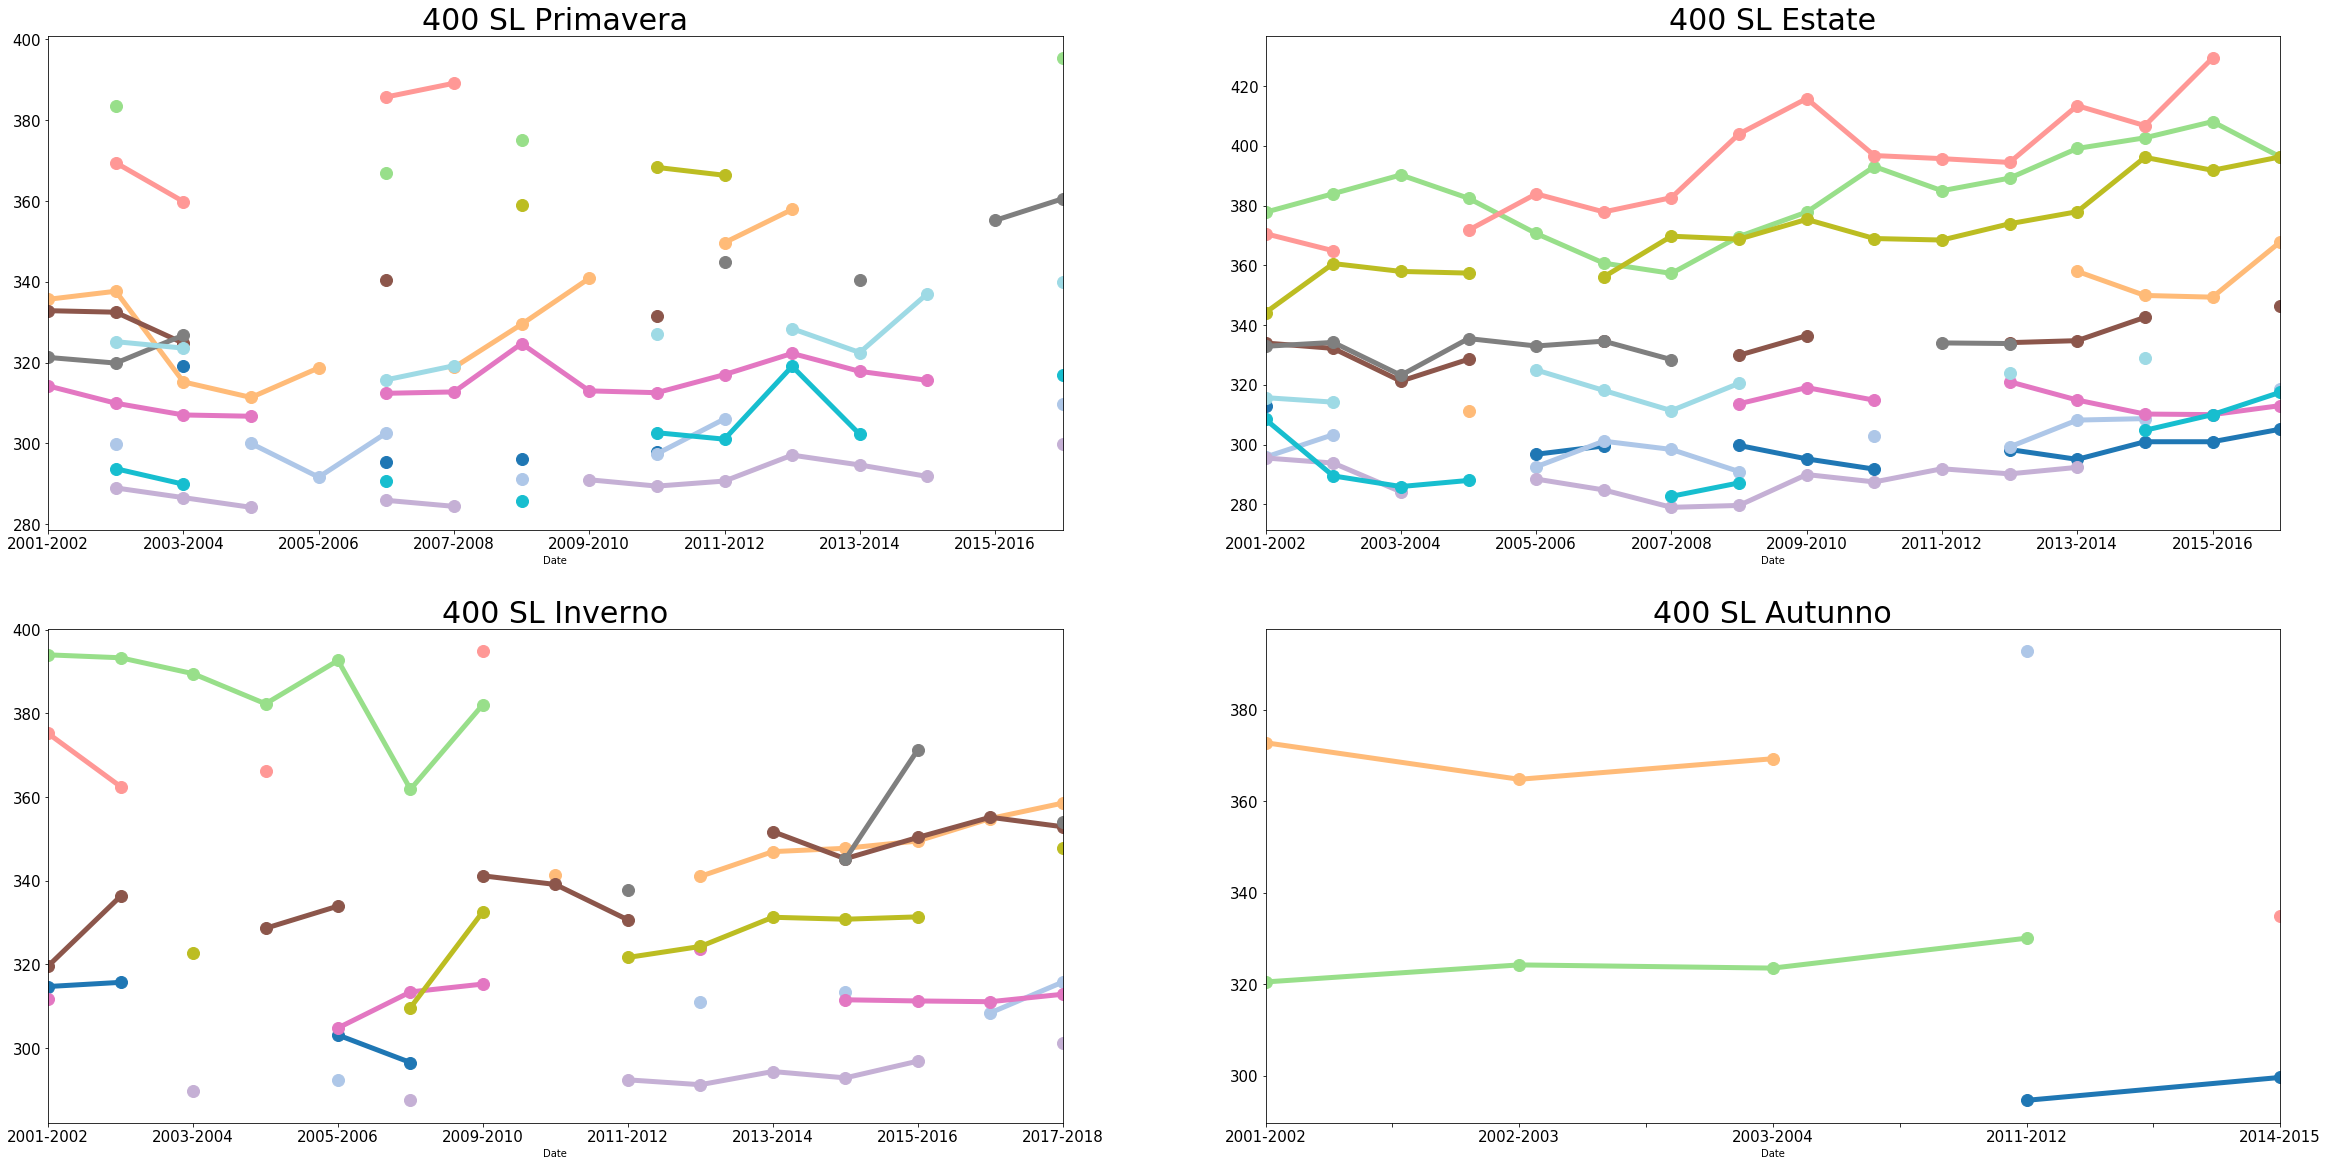

In [34]:
# Plottiamo i dati dei nuotatori in base alle Stagioni dell'anno
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (40,20))

Nuotatori_primavera_pivot.plot(ax=axes[0,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,0].set_title(S[Stile]+" Primavera",fontsize=30)

Nuotatori_estate_pivot.plot(ax=axes[0,1],marker= 'o', markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,1].set_title(S[Stile]+" Estate",fontsize=30)

Nuotatori_inverno_pivot.plot(ax=axes[1,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,0].set_title(S[Stile]+" Inverno",fontsize=30)

Nuotatori_autunno_pivot.plot(ax=axes[1,1],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,1].set_title(S[Stile]+" Autunno",fontsize=30)

In [35]:
# Funzione che ci permette di dividere i dati in base alle Stagioni
def select_term_of_year(d):
        """prende in input una data formattata in datetime e decide la stagionalita` dell'anno di partecipazione"""
        date = datetime.strptime(d[1], "%d/%m/%Y")
        if s=='inverno':
            if date.month >= 12 or date.month <= 2:
                return True
        if s=='primavera':
            if date.month >= 3 and date.month <= 5:
                return True
        if s=='estate':
            if date.month >= 6 and date.month <= 8:
                return True
        if s=='autunno':
            if date.month >= 9 and date.month <= 11:
                return True
        return False

In [65]:
# Funzione che ci permette di dividere i dati in base ai semestri
def select_semester_of_year(i,s):
    """prende in input un nuotatore e organizza i dati in base alla semestralita` dell'anno di partecipazione"""
    nomep=[]
    datep=[]
    tempip=[]
    nomes=[]
    dates=[]
    tempis=[]
    nomet=[]
    datet=[]
    tempit=[]
    nomeq=[]
    dateq=[]
    tempiq=[]
    if s==4:   
        for j in i.times_date:
            date = datetime.strptime(j[1], "%d/%m/%Y")
            if date.month >= 10 or date.month >= 12:
                nomep.append(i.name)
                datep.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempip.append(j[0])
            if date.month >= 1 or date.month <= 3:
                nomes.append(i.name)
                dates.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempis.append(j[0])
            if date.month >= 4 or date.month <= 6:
                nomet.append(i.name)
                datet.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempit.append(j[0])
            if date.month >= 7 or date.month <= 9:
                nomeq.append(i.name)
                dateq.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempiq.append(j[0])
        return nomep, datep, tempip, nomes, dates, tempis, nomet, datet, tempit, nomeq, dateq, tempiq

    if s==6:   
        for j in i.times_date:
            date = datetime.strptime(j[1], "%d/%m/%Y")
            if date.month >= 10 or date.month <= 12:
                nomep.append(i.name)
                datep.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempip.append(str_to_time(j))
            if date.month >= 1 or date.month <= 3:
                nomes.append(i.name)
                dates.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempis.append(str_to_time(j))
        return nomep, datep, tempip, nomes, dates, tempis

    if s==3:   
        for j in i.times_date:
            date = datetime.strptime(j[1], "%d/%m/%Y")
            if date.month >= 10 or date.month <= 1:
                nomep.append(i.name)
                datep.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempip.append((str_to_time(j)))
            if date.month >= 2 or date.month <= 5:
                nomes.append(i.name)
                dates.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempis.append((str_to_time(j)))
            if date.month >= 6 or date.month <= 9:
                nomet.append(i.name)
                datet.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
                tempit.append((str_to_time(j)))
        return nomep, datep, tempip, nomes, dates, tempis, nomet, datet, tempit
        

In [72]:
# Dividiamo i dati dei nuotatori in base ai semestri dell'anno che scegliamo
nomep=[]
datep=[]
timep=[]
nomes=[]
dates=[]
times=[]
nomet=[]
datet=[]
timet=[]
nomeq=[]
dateq=[]
timeq=[]
nsemestri = 4
Nuotatori_primo_quadrimestre = pd.DataFrame(columns=['Nuotatore', 'Time', 'Date'])
Nuotatori_secondo_quadrimestre = pd.DataFrame(columns=['Nuotatore', 'Time', 'Date'])
Nuotatori_terzo_quadrimestre = pd.DataFrame(columns=['Nuotatore', 'Time', 'Date'])
Nuotatori_quarto_quadrimestre = pd.DataFrame(columns=['Nuotatore', 'Time', 'Date'])
for i in filtered_swimmers:
#     if nsemestri==4:       
        np, dp, tp, ns, ds, ts, nt, dt, tt, nq, dq, tq = select_semester_of_year(i,nsemestri)
#     for j in np:
#         nomep.append(j)
#     for j in dp:
#         datep.append(j)
#     for j in tp:
#         timep.append(j)
#     for j in ns:
#         nomes.append(j)
#     for j in ds:
#         dates.append(j)
#     for j in ts:
#         times.append(j)
#     for j in nt:
#         nomet.append(j)
#     for j in dt:
#         datet.append(j)
#     for j in tt:
#         timet.append(j)
#     for j in nq:
#         nomeq.append(j)
#     for j in dq:
#         dateq.append(j)
#     for j in tq:
#         timeq.append(j)
#     nomep.append(np)
#     datep.append(dp)
#     timep.append(tp)
#     nomes.append(ns)
#     dates.append(ds)
#     times.append(ts)
#     nomet.append(nt)
#     datet.append(dt)
#     timet.append(tt)
#     nomeq.append(nq)
#     dateq.append(dq)
#     timeq.append(tq)
#         print (nomep)
        
        Npq = pd.DataFrame({'Nuotatore': np,'Time': tp, 'Date': dp})
        Nsq = pd.DataFrame({'Nuotatore': ns,'Time': ts, 'Date': ds})
        Ntq = pd.DataFrame({'Nuotatore': nt,'Time': tt, 'Date': dt})
        Nqq = pd.DataFrame({'Nuotatore': nq,'Time': tq, 'Date': dq})
        print(Npq)
        Nuotatori_primo_quadrimestre.append(Npq)
#         print(Nuotatori_primo_quadrimestre)
        Nuotatori_secondo_quadrimestre.append(Nsq)
        Nuotatori_terzo_quadrimestre.append(Ntq)
        Nuotatori_quarto_quadrimestre.append(Nqq)
#     if nsemestri == 6:
#         select_semester_of_year(i,nsemestri)
#         Nuotatori_primo_semestre = pd.DataFrame({'Nuotatore': np,'Time': tp, 'Date': dp})
#         Nuotatori_secondo_semestre = pd.DataFrame({'Nuotatore': ns,'Time': ts, 'Date': ds})
#     if nsemestri == 3:
#         select_semester_of_year(i,nsemestri)
#         Nuotatori_primo_trimestre = pd.DataFrame({'Nuotatore': np,'Time': tp, 'Date': dp})
#         Nuotatori_secondo_trimestre = pd.DataFrame({'Nuotatore': ns,'Time': ts, 'Date': ds})
#         Nuotatori_terzo_trimestre = pd.DataFrame({'Nuotatore': nt,'Time': tt, 'Date': dt})


# Nuotatori_primo_quadrimestre = pd.DataFrame({'Nuotatore': nomep,'Time': timep, 'Date': datep})
# Nuotatori_secondo_quadrimestre = pd.DataFrame({'Nuotatore': nomes,'Time': times, 'Date': dates})
# Nuotatori_terzo_quadrimestre = pd.DataFrame({'Nuotatore': nomet,'Time': timet, 'Date': datet})
# Nuotatori_quarto_quadrimestre = pd.DataFrame({'Nuotatore': nomeq,'Time': timeq, 'Date': dateq})
# print (Nuotatori_primo_quadrimestre)
      

        Date        Nuotatore      Time
0  2012-2013  D'ARPA GIROLAMO  04:51.23
1  2011-2012  D'ARPA GIROLAMO  04:52.39
2  2014-2015  D'ARPA GIROLAMO  04:52.86
3  2013-2014  D'ARPA GIROLAMO  04:54.38
4  2015-2016  D'ARPA GIROLAMO  04:55.53
5  2017-2018  D'ARPA GIROLAMO  05:01.09
Empty DataFrame
Columns: [Nuotatore, Time, Date]
Index: []
Empty DataFrame
Columns: [Date, Nuotatore, Time]
Index: []
Empty DataFrame
Columns: [Nuotatore, Time, Date]
Index: []
        Date        Nuotatore      Time
0  2016-2017  BERRINI CLAUDIO  05:08.40
1  2012-2013  BERRINI CLAUDIO  05:11.05
2  2014-2015  BERRINI CLAUDIO  05:13.42
3  2017-2018  BERRINI CLAUDIO  05:15.76
Empty DataFrame
Columns: [Nuotatore, Time, Date]
Index: []
        Date       Nuotatore      Time
0  2011-2012  ALFONSI EMIDIO  04:54.57
1  2014-2015  ALFONSI EMIDIO  04:59.58
2  2002-2003  ALFONSI EMIDIO  05:15.70
Empty DataFrame
Columns: [Nuotatore, Time, Date]
Index: []
        Date           Nuotatore      Time
0  2014-2015  MASSA MASSIM

In [ ]:
# Aggiustiamo i dati, raggruppandoli
Nuotatori_primo_quadrimestre_plot = pd.DataFrame(Nuotatori_primo_quadrimestre.groupby([Nuotatori_primavera['Date'], Nuotatori_primavera['Nuotatore']]).Time.agg('mean'))
Nuotatori_secondo_quadrimestre_plot = pd.DataFrame(Nuotatori_secondo_quadrimestre.groupby([Nuotatori_estate['Date'], Nuotatori_estate['Nuotatore']]).Time.agg('mean'))
Nuotatori_terzo_quadrimestre_plot = pd.DataFrame(Nuotatori_terzo_quadrimestre.groupby([Nuotatori_autunno['Date'], Nuotatori_autunno['Nuotatore']]).Time.agg('mean'))
Nuotatori_quarto_quadrimestre_plot = pd.DataFrame(Nuotatori_quarto_quadrimestre.groupby([Nuotatori_inverno['Date'], Nuotatori_inverno['Nuotatore']]).Time.agg('mean'))                  

In [ ]:
Nuotatori_primo_quadrimestre_pivot = Nuotatori_primo_quadrimestre_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_secondo_quadrimestre_pivot = Nuotatori_secondo_quadrimestre_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_terzo_quadrimestre_pivot = Nuotatori_terzo_quadrimestre_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_quarto_quadrimestre_pivot = Nuotatori_quarto_quadrimestre_plot.pivot_table(index='Date', columns='Nuotatore')

In [ ]:
# Plottiamo i dati dei nuotatori in base alle Stagioni dell'anno
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (40,20))

Nuotatori_primo_quadrimestre_pivot.plot(ax=axes[0,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,0].set_title(S[Stile]+" Primo Quadrimestre",fontsize=30)

Nuotatori_secondo_quadrimestre_pivot.plot(ax=axes[0,1],marker= 'o', markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,1].set_title(S[Stile]+" Secondo Quadrimestre",fontsize=30)

Nuotatori_terzo_quadrimestre_pivot.plot(ax=axes[1,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,0].set_title(S[Stile]+" Terzo Quadrimestre",fontsize=30)

Nuotatori_quarto_quadrimestre_pivot.plot(ax=axes[1,1],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,1].set_title(S[Stile]+" Quarto Quadrimestre",fontsize=30)